# Latar Belakang
Industri transportasi kota, terutama layanan taksi, mengalami transformasi yang signifikan dengan adopsi teknologi dan peningkatan persaingan antar penyedia layanan. Sebagai bagian dari evolusi ini, perusahaan transportasi perlu secara cermat mengevaluasi kinerja mitra dan penyedia layanan untuk memastikan kepuasan pelanggan yang optimal dan efisiensi operasional. Analisis data New York City TLC Trip Record menunjukkan perbandingan kinerja antara dua Vendor utama, yaitu Creative Mobile Technologies, LLC. (VendorID1) dan VeriFone (VendorID2).

Creative Mobile Technologies, LLC. dan VeriFone merupakan dua pemain utama dalam penyediaan layanan transportasi di kota ini. Dalam rangka meningkatkan kualitas layanan, efisiensi operasional, dan keuntungan bisnis, perusahaan perlu memahami secara mendalam perbedaan kinerja antara kedua Vendor tersebut.

Analisis data mencakup parameter-parameter kunci seperti jumlah penumpang, tipe perjalanan, total biaya, dan jarak perjalanan. Hasil analisis ini memberikan wawasan yang jelas tentang keunggulan kinerja VeriFone dibandingkan Creative Mobile Technologies, LLC., yang dapat membimbing keputusan perusahaan dalam pemilihan Vendor untuk meningkatkan kualitas layanan dan kepuasan pelanggan.

Dalam konteks perubahan dinamis dalam industri transportasi, pemahaman mendalam tentang kinerja Vendor menjadi krusial. Latar belakang ini memberikan landasan bagi perusahaan untuk mengambil langkah-langkah strategis yang sesuai dengan tujuan bisnis mereka, sekaligus memberikan dasar untuk pengambilan keputusan yang efektif dalam mengelola hubungan dengan mitra penyedia layanan.  


## Pernyataan Masalah
Perusahaan ingin mengetahui **Vendor penyedia layananmana yang kinerja dan performanya nya lebih baik**. Informasi ini akan membantu perusahaan untuk mengetahui dan memilih Vendor mana yang memiliki kinerja yang baik, berdasarkan:

    1. Passanger_Count 

    2. Trip_type  

    3. Total_amount

    4. Trip_distance


# Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

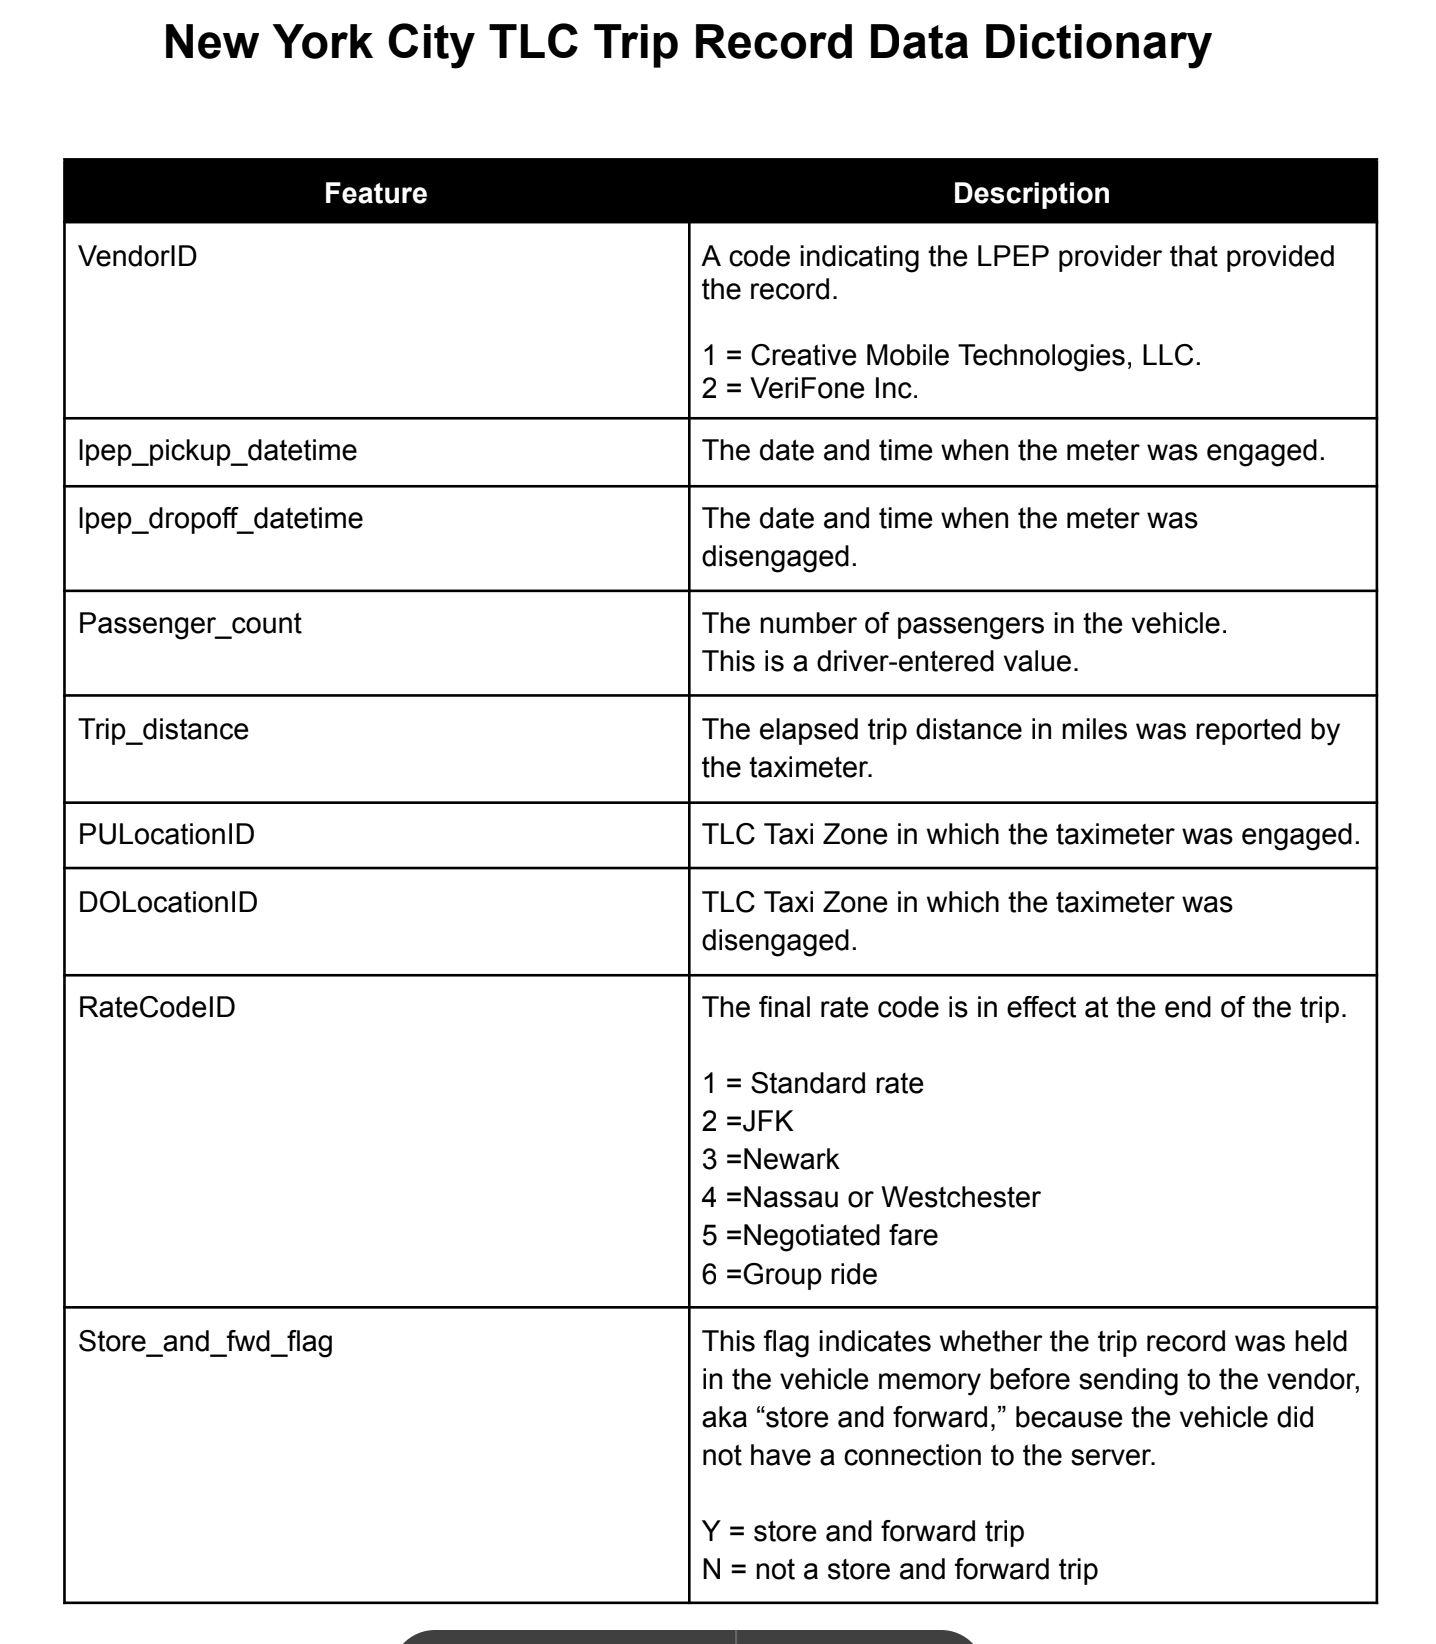

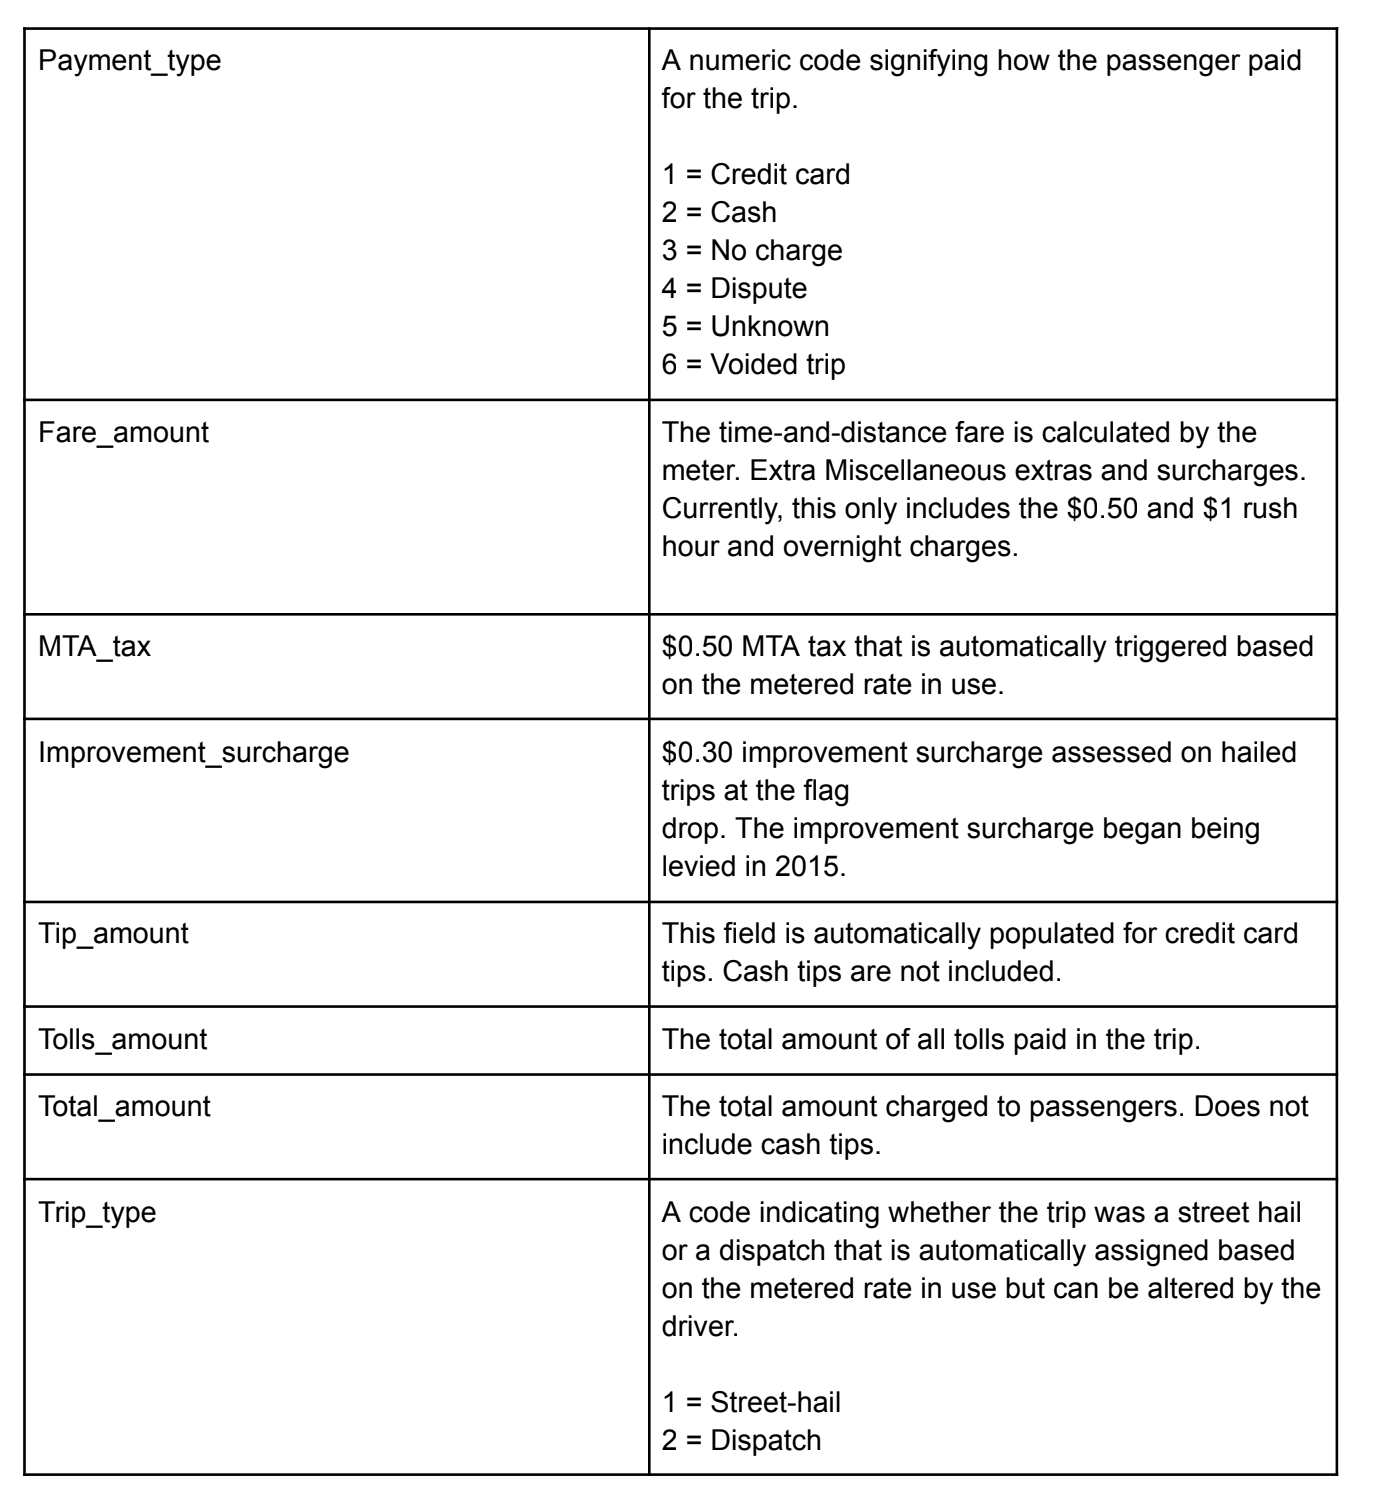

In [2]:
df=pd.read_csv('NYC_TLC_Trip_Record.csv')
display(df.head(),df.tail())

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN
68210,2,2023-01-31 23:51:00,2023-02-01 00:07:00,NaN,NaN,256,140,NaN,5.82,23.65,0.0,0.0,2.00,0.0,NaN,1.0,29.40,NaN,NaN,NaN


## Data Understanding and Cleaning
Sebelum kita mulai menganalisis data, mari kita kenali dataset kita lebih jauh dalam tahap Pemahaman Data. Langkah ini membantu kita mengidentifikasi anomali dalam dataset yang perlu ditangani pada tahap Pembersihan Data. Setiap tindakan pembersihan data akan disertai dengan penjelasan mengenai langkah yang diambil, baik dari sudut pandang pengetahuan domain maupun statistik.

Mari kita perhatikan informasi penting dalam dataset New York City TLC Trip Record:



In [3]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (68211, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14

In [4]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


In [5]:
display(df.describe(), df.describe(include='object'))

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211.000000,63887.000000,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,0.0,68211.000000,68211.000000,63887.000000,63877.000000,63887.000000
mean,1.863028,1.117160,98.549735,138.429901,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,NaN,0.951625,21.789377,1.373613,1.021933,0.726748
std,0.343820,1.372913,61.244314,76.761311,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,NaN,0.196875,15.457115,0.508039,0.146465,1.212836
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,NaN,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,12.900000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,NaN,1.000000,17.900000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,NaN,1.000000,26.150000,2.000000,1.000000,2.750000
max,2.000000,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,NaN,1.000000,491.000000,5.000000,2.000000,2.750000


,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag
count,68211,68211,63887
unique,66575,66519,2
top,2023-01-09 09:08:00,2023-01-09 00:00:00,N
freq,4,6,63579


In [6]:
# Mengecek Uniqe Values dan melihatkan baris dan kolom yang ada
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None) 

def unique_data(df):
    data_unique = pd.DataFrame()
    data_unique['Columns'] = df.columns
    data_unique['Unique Count'] = [df[col].nunique() for col in (df.columns)]
    data_unique['Unique'] = [df[col].unique() for col in (df.columns)] 
    return data_unique

unique_data(df)

,Columns,Unique Count,Unique
0,VendorID,2,"[2, 1]"
1,lpep_pickup_datetime,66575,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 2023-01-01 00:35:12, 2023-01-01 00:13:14, 2023-01-01 00:33:04, 2023-01-01 00:53:31, 2023-01-01 00:09:14, 2023-01-01 00:11:58, 2023-01-01 00:41:29, 2023-01-01 00:50:32, 2023-01-01 00:16:12, 2023-01-01 00:08:43, 2023-01-01 00:26:32, 2023-01-01 00:18:35, 2023-01-01 00:39:32, 2023-01-01 00:49:34, 2023-01-01 00:10:45, 2023-01-01 00:35:11, 2023-01-01 00:31:06, 2023-01-01 00:14:37, 2023-01-01 00:26:21, 2023-01-01 00:41:56, 2023-01-01 00:32:02, 2023-01-01 00:55:13, 2023-01-01 00:01:31, 2023-01-01 00:22:31, 2023-01-01 00:57:28, 2023-01-01 00:35:21, 2023-01-01 00:52:52, 2023-01-01 00:32:56, 2023-01-01 00:24:01, 2023-01-01 00:46:48, 2023-01-01 00:40:58, 2023-01-01 00:20:23, 2023-01-01 01:49:24, 2023-01-01 00:41:53, 2023-01-01 00:56:26, 2023-01-01 00:33:10, 2023-01-01 00:58:28, 2023-01-01 00:42:49, 2023-01-01 00:48:21, 2023-01-01 00:08:05, 2023-01-01 00:13:47, 2023-01-01 00:16:10, 2023-01-01 00:04:25, 2023-01-01 00:33:38, 2023-01-01 00:46:08, 2023-01-01 01:00:08, 2023-01-01 00:28:04, 2023-01-01 00:23:04, 2023-01-01 00:34:07, 2023-01-01 00:52:03, 2023-01-01 00:25:31, 2023-01-01 00:53:09, 2023-01-01 00:42:37, 2023-01-01 00:39:52, 2023-01-01 00:15:32, 2023-01-01 00:06:48, 2023-01-01 00:57:15, 2023-01-01 00:14:13, 2023-01-01 00:52:48, 2023-01-01 00:34:13, 2023-01-01 00:44:41, 2023-01-01 00:11:12, 2023-01-01 01:44:43, 2023-01-01 01:04:44, 2023-01-01 01:48:11, 2023-01-01 01:11:39, 2023-01-01 01:54:25, 2023-01-01 01:59:10, 2023-01-01 01:22:35, 2023-01-01 01:37:10, 2023-01-01 01:46:22, 2023-01-01 01:59:48, 2023-01-01 01:09:49, 2023-01-01 01:23:35, 2023-01-01 01:53:20, 2023-01-01 01:32:14, 2023-01-01 01:01:05, 2023-01-01 01:34:41, 2023-01-01 01:52:08, 2023-01-01 01:49:28, 2023-01-01 01:03:59, 2023-01-01 01:13:11, 2023-01-01 01:40:06, 2023-01-01 01:33:50, 2023-01-01 01:45:19, 2023-01-01 01:51:29, 2023-01-01 01:34:07, 2023-01-01 01:10:08, 2023-01-01 01:32:17, 2023-01-01 01:48:28, 2023-01-01 01:30:43, 2023-01-01 01:51:10, 2023-01-01 01:09:36, 2023-01-01 01:19:54, 2023-01-01 01:31:10, 2023-01-01 01:42:30, 2023-01-01 00:57:51, 2023-01-01 01:27:36, ...]"
2,lpep_dropoff_datetime,66519,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 2023-01-01 00:41:32, 2023-01-01 00:19:03, 2023-01-01 00:39:02, 2023-01-01 01:11:04, 2023-01-01 00:26:39, 2023-01-01 00:24:55, 2023-01-01 00:46:26, 2023-01-01 01:13:42, 2023-01-01 00:41:43, 2023-01-01 00:17:08, 2023-01-01 00:45:31, 2023-01-01 00:30:09, 2023-01-01 01:18:06, 2023-01-01 01:08:23, 2023-01-01 00:19:37, 2023-01-01 01:17:35, 2023-01-01 00:42:23, 2023-01-01 00:21:50, 2023-01-01 00:30:26, 2023-01-01 00:46:06, 2023-01-01 00:41:25, 2023-01-01 00:59:47, 2023-01-01 00:16:02, 2023-01-01 00:39:24, 2023-01-01 01:09:31, 2023-01-01 00:53:49, 2023-01-01 01:00:53, 2023-01-01 00:42:53, 2023-01-01 00:32:05, 2023-01-01 01:08:17, 2023-01-01 01:04:32, 2023-01-01 00:24:32, 2023-01-01 01:57:51, 2023-01-01 00:41:58, 2023-01-01 01:14:41, 2023-01-01 00:43:08, 2023-01-01 01:14:46, 2023-01-01 00:51:53, 2023-01-01 01:23:50, 2023-01-01 00:13:26, 2023-01-01 00:25:57, 2023-01-01 00:54:55, 2023-01-01 00:17:50, 2023-01-01 00:38:51, 2023-01-01 00:59:10, 2023-01-01 01:05:46, 2023-01-01 00:43:45, 2023-01-01 23:18:32, 2023-01-01 00:50:01, 2023-01-01 00:57:56, 2023-01-01 00:38:40, 2023-01-01 01:13:35, 2023-01-01 00:47:15, 2023-01-01 00:48:54, 2023-01-01 00:23:03, 2023-01-01 01:08:47, 2023-01-01 01:00:15, 2023-01-01 00:25:43, 2023-01-01 01:21:19, 2023-01-01 00:43:57, 2023-01-01 00:48:26, 2023-01-01 00:38:12, 2023-01-01 01:57:31, 2023-01-01 01:11:23, 2023-01-01 02:05:51, 2023-01-01 01:41:21, 2023-01-01 02:05:19, 2023-01-01 02:11:36, 2023-01-01 01:25:11, 2023-01-01 01:41:30, 2023-01-01 02:04:14, 2023-01-01 02:05:29, 2023-01-01 01:17:55, 2023-01-01 01:53:43, 2023-01-01 02:27:01, 2023-01-01 01:43:55, 2023-01-01 01:13:02, 2023-01-01 02:00:06, 2023-01-01 02:00:57, 2023-01-01 02:13:18, 2023-01-01 01:07:17, 2023-01-01 01:26:01, 2023-01-01 01:49

### Missing Value

In [7]:
df.isna().sum()

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        4324
RatecodeID                4324
PULocationID                 0
DOLocationID                 0
passenger_count           4324
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                68211
improvement_surcharge        0
total_amount                 0
payment_type              4324
trip_type                 4334
congestion_surcharge      4324
dtype: int64

In [8]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100


VendorID                   0.000000
lpep_pickup_datetime       0.000000
lpep_dropoff_datetime      0.000000
store_and_fwd_flag         6.339154
RatecodeID                 6.339154
PULocationID               0.000000
DOLocationID               0.000000
passenger_count            6.339154
trip_distance              0.000000
fare_amount                0.000000
extra                      0.000000
mta_tax                    0.000000
tip_amount                 0.000000
tolls_amount               0.000000
ehail_fee                100.000000
improvement_surcharge      0.000000
total_amount               0.000000
payment_type               6.339154
trip_type                  6.353814
congestion_surcharge       6.339154
dtype: float64

Secara umum, kita bisa melihat bahwa:
1. store_and_fwd_flag:

Persentase Missing Values: 6.34%
Tindakan: Hapus baris dengan nilai yang hilang atau gantilah dengan nilai yang sesuai jika memungkinkan.

2. RatecodeID, passenger_count, payment_type, trip_type, congestion_surcharge:

Persentase Missing Values: 6.34% - 6.35%
Tindakan: Hapus baris dengan nilai yang hilang atau gantilah 
dengan nilai yang sesuai jika memungkinkan.

3. ehail_fee:

Persentase Missing Values: 100%
Tindakan: Hapus kolom ini karena semua nilainya hilang.

Setelah tindakan pembersihan ini, dataset akan lebih siap untuk digunakan dalam analisis lebih lanjut. Pemahaman terhadap persentase nilai yang hilang membantu kita menentukan langkah-langkah yang sesuai untuk mempertahankan integritas dataset.

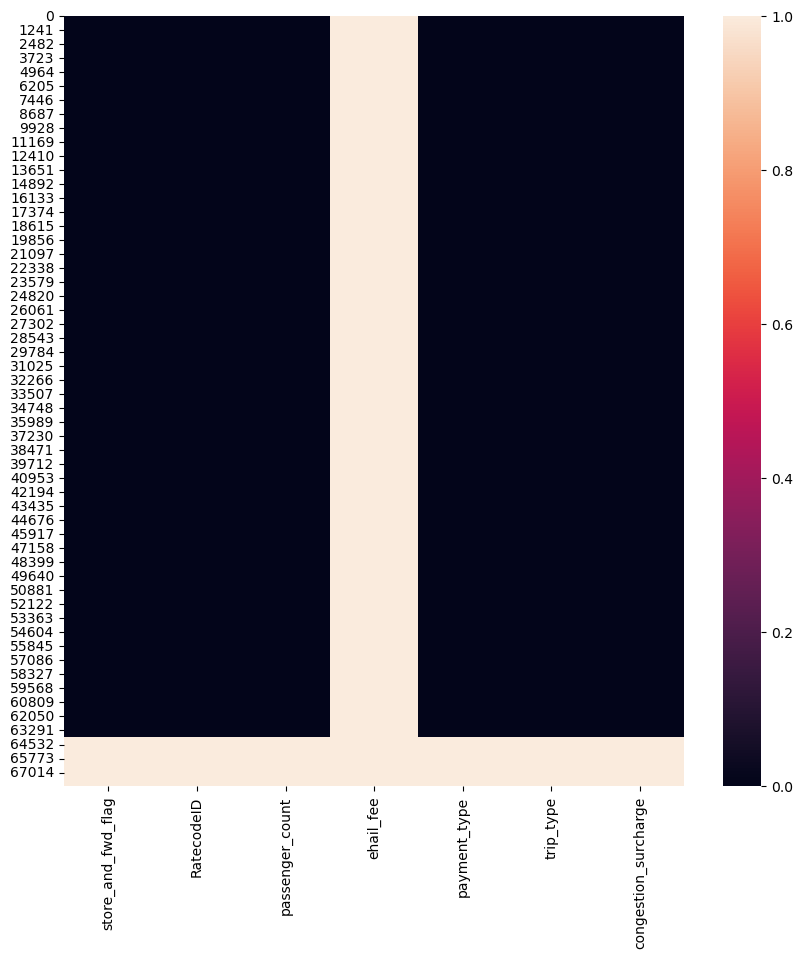

In [9]:
# Sebaran missing value di dalam data
plt.figure(figsize=(10,10))
sns.heatmap(df[['store_and_fwd_flag','RatecodeID','passenger_count','ehail_fee','payment_type','trip_type','congestion_surcharge']].isna());

# 1. Data CLeanning

In [10]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


# Melihat Outlier pada data numerical yang diteliti

In [11]:
data_numeric = ['passenger_count', 'trip_distance','fare_amount','mta_tax','tip_amount', 'tolls_amount','improvement_surcharge','total_amount']

Text(0.5, 1.0, 'Distribution from numericals data by Boxplot')

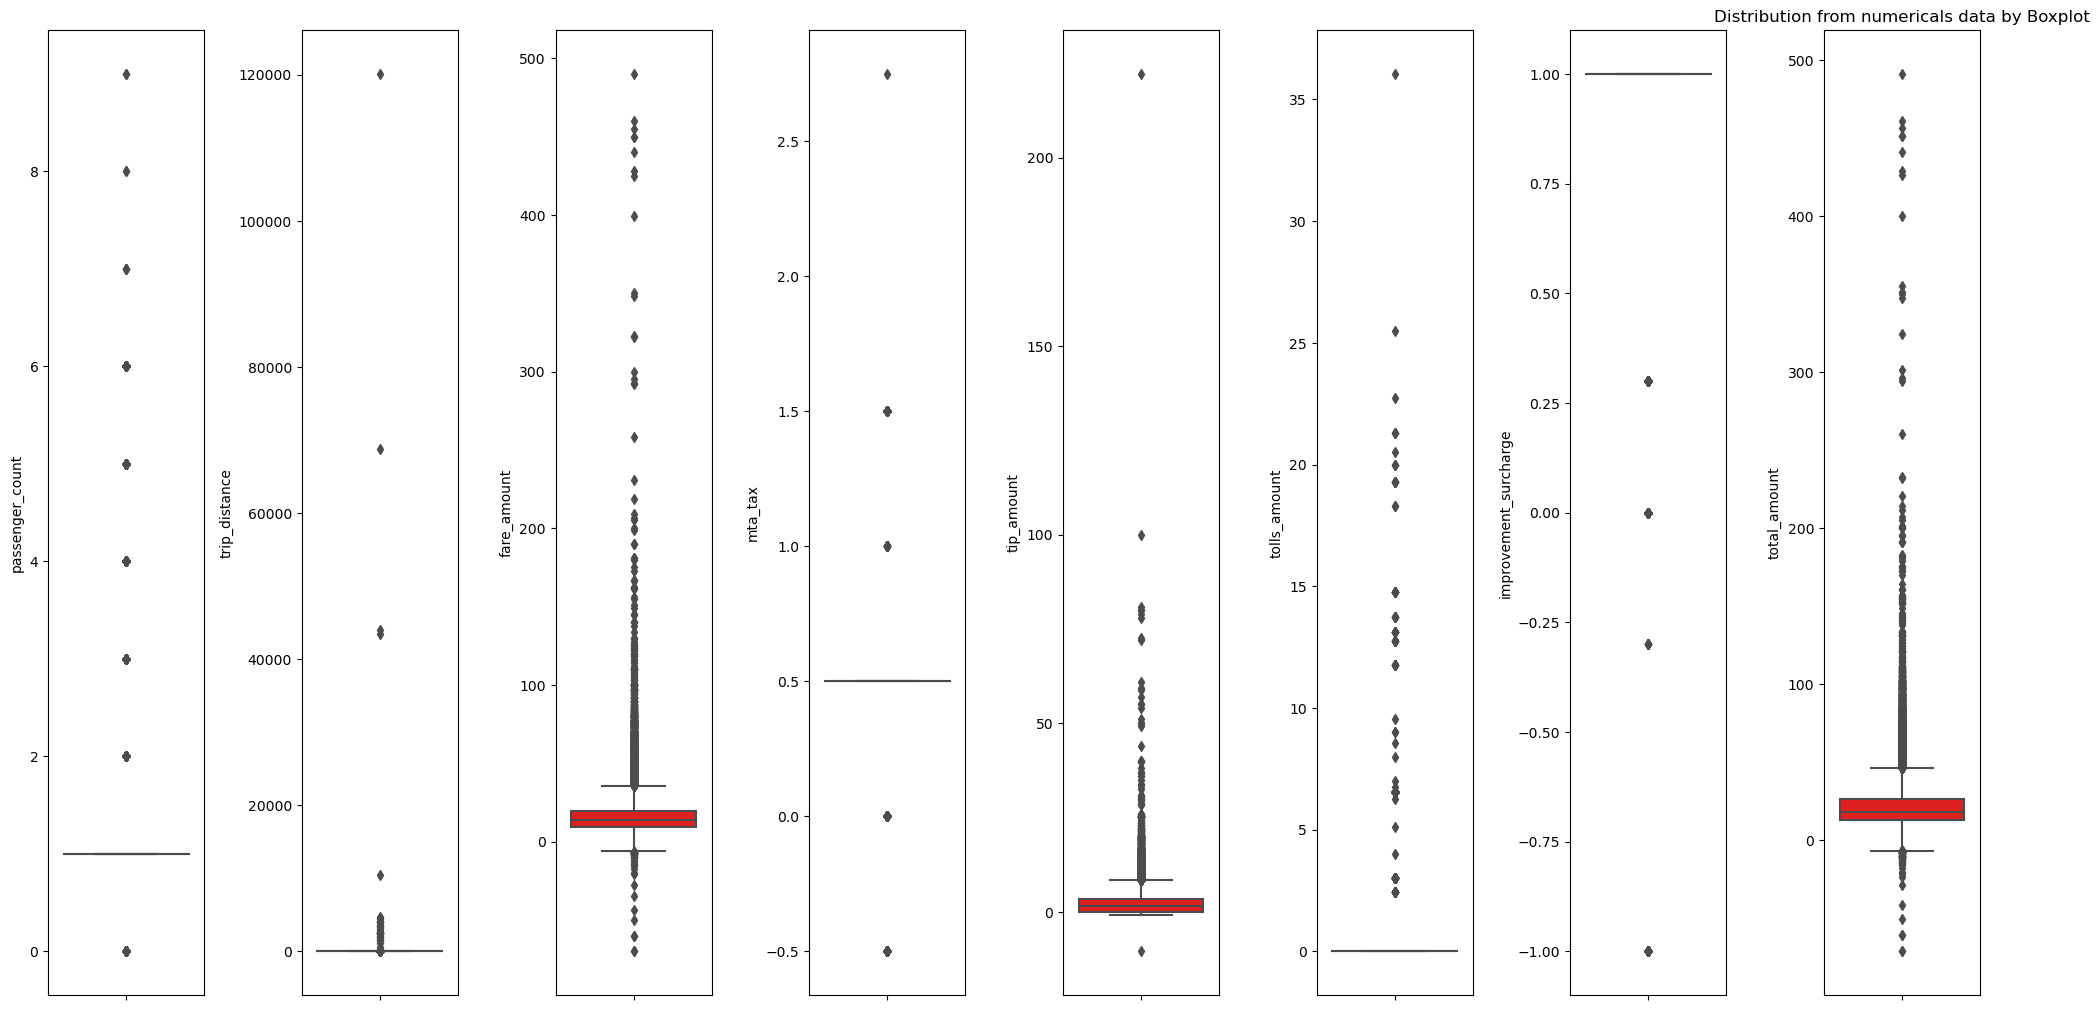

In [12]:
features = data_numeric
plt.figure(figsize=(20,10))
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color = 'red', orient = 'v')
    plt.tight_layout()
plt.title('Distribution from numericals data by Boxplot')


### 1.1 Mengisi data kosong "store_and_fwd_flag"

Dari kolom 'store_and_fwd_flag_mode'kita akan isi dengan nilai terbanyak yang sering muncul (mode) unutuk mengisi missing value

In [13]:
df['store_and_fwd_flag'].mode()[0]

'N'

In [14]:
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].fillna(df['store_and_fwd_flag'].mode()[0])

In [15]:
df.isna().sum()

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag           0
RatecodeID                4324
PULocationID                 0
DOLocationID                 0
passenger_count           4324
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                68211
improvement_surcharge        0
total_amount                 0
payment_type              4324
trip_type                 4334
congestion_surcharge      4324
dtype: int64

In [16]:
len(df[df['store_and_fwd_flag']=='Y'])

308

In [17]:
len(df[df['store_and_fwd_flag']=='N'])

67903

In [18]:
df.isna().sum()

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag           0
RatecodeID                4324
PULocationID                 0
DOLocationID                 0
passenger_count           4324
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                68211
improvement_surcharge        0
total_amount                 0
payment_type              4324
trip_type                 4334
congestion_surcharge      4324
dtype: int64

### 1.2 Mengisi data kosong "RatecodeID"

Untuk mengisi missing value RatecodeID kita akan isi dengan nilai tengah (median).

In [19]:
df['RatecodeID'].median()

1.0

Setelah itu melakukan pengisian missing value berdasarkan hasil (median) dari RatecodeID.

In [20]:
df['RatecodeID'] = df['RatecodeID'].fillna(df['RatecodeID'].median())

In [21]:
df.isna().sum()

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag           0
RatecodeID                   0
PULocationID                 0
DOLocationID                 0
passenger_count           4324
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                68211
improvement_surcharge        0
total_amount                 0
payment_type              4324
trip_type                 4334
congestion_surcharge      4324
dtype: int64

* Mengubah Dtype Float menjadi Int

In [22]:
df['RatecodeID'] = df['RatecodeID'].astype(int)

In [23]:
df['RatecodeID']

0         1
1         1
2         1
3         1
4         1
5         1
6         1
7         1
8         1
9         1
10        1
11        1
12        1
13        1
14        1
15        1
16        5
17        1
18        1
19        1
20        1
21        1
22        1
23        1
24        1
25        1
26        1
27        1
28        1
29        1
30        1
31        4
32        5
33        1
34        1
35        1
36        1
37        1
38        1
39        1
40        1
41        1
42        1
43        5
44        1
45        1
46        1
47        1
48        1
49        1
50        1
51        1
52        1
53        1
54        1
55        5
56        1
57        1
58        1
59        1
60        1
61        1
62        1
63        1
64        1
65        1
66        1
67        1
68        1
69        1
70        1
71        1
72        1
73        1
74        1
75        1
76        1
77        1
78        1
79        1
80        1
81        1
82        1
83  

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     68211 non-null  object 
 4   RatecodeID             68211 non-null  int64  
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

### 1.3 Mengisi data kosong "passenger_count"

Mengisi missing value pada kolom 'passenger_count" dengan nilai tengah(median).

In [25]:
df['passenger_count'] = df['passenger_count'].fillna(df['passenger_count'].median())

In [26]:
df.isna().sum()

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag           0
RatecodeID                   0
PULocationID                 0
DOLocationID                 0
passenger_count              0
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                68211
improvement_surcharge        0
total_amount                 0
payment_type              4324
trip_type                 4334
congestion_surcharge      4324
dtype: int64

In [27]:
df['passenger_count'].value_counts()

passenger_count
1.0    58623
2.0     5096
5.0     1772
6.0     1054
3.0      958
4.0      364
0.0      336
7.0        4
9.0        2
8.0        2
Name: count, dtype: int64

untuk passengger count 0.0 dihapus karena menajdi sebuah anomali

In [28]:
df = df[~(df['passenger_count']==0.0)]

untuk passenger count 7, 8 dan 9 akan dihapus karena hanya sedikit

In [29]:
df = df[~(df['passenger_count']==7.0)]

In [30]:
df = df[~(df['passenger_count']==8.0)]

In [31]:
df = df[~(df['passenger_count']==9.0)]

* Mengubah Dtype Float menjadi Int pada kolom 'passanger_count'

In [32]:
df['passenger_count'] = df['passenger_count'].astype(int)

In [33]:
df['passenger_count'].value_counts()

passenger_count
1    58623
2     5096
5     1772
6     1054
3      958
4      364
Name: count, dtype: int64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67867 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               67867 non-null  int64  
 1   lpep_pickup_datetime   67867 non-null  object 
 2   lpep_dropoff_datetime  67867 non-null  object 
 3   store_and_fwd_flag     67867 non-null  object 
 4   RatecodeID             67867 non-null  int64  
 5   PULocationID           67867 non-null  int64  
 6   DOLocationID           67867 non-null  int64  
 7   passenger_count        67867 non-null  int64  
 8   trip_distance          67867 non-null  float64
 9   fare_amount            67867 non-null  float64
 10  extra                  67867 non-null  float64
 11  mta_tax                67867 non-null  float64
 12  tip_amount             67867 non-null  float64
 13  tolls_amount           67867 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  improve

### 1.4 Menghapus data pada kolom "ehail_fee"

Kolom 'ehail_fee' akan dihapus(drop) karena mempunyai missing value 100% dan tidak ada di dictionary

In [35]:
df = df.drop(columns='ehail_fee')

In [36]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1,166,143,1,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1,24,43,1,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1,223,179,1,0.00,7.2,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1,41,238,1,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1,41,74,1,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00


In [37]:
df.isna().sum()

VendorID                    0
lpep_pickup_datetime        0
lpep_dropoff_datetime       0
store_and_fwd_flag          0
RatecodeID                  0
PULocationID                0
DOLocationID                0
passenger_count             0
trip_distance               0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
payment_type             4324
trip_type                4334
congestion_surcharge     4324
dtype: int64

### 1.5 Mengisi missing value pada "payment_type"

A numeric code signifying how the passenger paid

for the trip.
1 = Credit card
2 = Cash
3 = No charge
4 = Dispute
5 = Unknown
6 = Voided trip

In [38]:
df['payment_type'] = df['payment_type'].fillna(5.0)

In [39]:
df.isna().sum()

VendorID                    0
lpep_pickup_datetime        0
lpep_dropoff_datetime       0
store_and_fwd_flag          0
RatecodeID                  0
PULocationID                0
DOLocationID                0
passenger_count             0
trip_distance               0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
payment_type                0
trip_type                4334
congestion_surcharge     4324
dtype: int64

In [40]:
len(df[df['payment_type']== 5.0])

4326

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67867 entries, 0 to 68210
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               67867 non-null  int64  
 1   lpep_pickup_datetime   67867 non-null  object 
 2   lpep_dropoff_datetime  67867 non-null  object 
 3   store_and_fwd_flag     67867 non-null  object 
 4   RatecodeID             67867 non-null  int64  
 5   PULocationID           67867 non-null  int64  
 6   DOLocationID           67867 non-null  int64  
 7   passenger_count        67867 non-null  int64  
 8   trip_distance          67867 non-null  float64
 9   fare_amount            67867 non-null  float64
 10  extra                  67867 non-null  float64
 11  mta_tax                67867 non-null  float64
 12  tip_amount             67867 non-null  float64
 13  tolls_amount           67867 non-null  float64
 14  improvement_surcharge  67867 non-null  float64
 15  total_a

In [42]:
df['payment_type'] = df['payment_type'].astype(str)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67867 entries, 0 to 68210
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               67867 non-null  int64  
 1   lpep_pickup_datetime   67867 non-null  object 
 2   lpep_dropoff_datetime  67867 non-null  object 
 3   store_and_fwd_flag     67867 non-null  object 
 4   RatecodeID             67867 non-null  int64  
 5   PULocationID           67867 non-null  int64  
 6   DOLocationID           67867 non-null  int64  
 7   passenger_count        67867 non-null  int64  
 8   trip_distance          67867 non-null  float64
 9   fare_amount            67867 non-null  float64
 10  extra                  67867 non-null  float64
 11  mta_tax                67867 non-null  float64
 12  tip_amount             67867 non-null  float64
 13  tolls_amount           67867 non-null  float64
 14  improvement_surcharge  67867 non-null  float64
 15  total_a

### 1.6 Mengisi missing value pada "trip_type"

Untuk mengisi missing value trip_type kita akan isi dengan nilai tengah (median).

In [44]:
df['trip_type'].median()

1.0

In [45]:
df['trip_type'] = df['trip_type'].fillna(df['trip_type'].median())

In [46]:
df.isna().sum()

VendorID                    0
lpep_pickup_datetime        0
lpep_dropoff_datetime       0
store_and_fwd_flag          0
RatecodeID                  0
PULocationID                0
DOLocationID                0
passenger_count             0
trip_distance               0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
payment_type                0
trip_type                   0
congestion_surcharge     4324
dtype: int64

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67867 entries, 0 to 68210
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               67867 non-null  int64  
 1   lpep_pickup_datetime   67867 non-null  object 
 2   lpep_dropoff_datetime  67867 non-null  object 
 3   store_and_fwd_flag     67867 non-null  object 
 4   RatecodeID             67867 non-null  int64  
 5   PULocationID           67867 non-null  int64  
 6   DOLocationID           67867 non-null  int64  
 7   passenger_count        67867 non-null  int64  
 8   trip_distance          67867 non-null  float64
 9   fare_amount            67867 non-null  float64
 10  extra                  67867 non-null  float64
 11  mta_tax                67867 non-null  float64
 12  tip_amount             67867 non-null  float64
 13  tolls_amount           67867 non-null  float64
 14  improvement_surcharge  67867 non-null  float64
 15  total_a

In [48]:
df['trip_type'] = df['trip_type'].astype(str)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67867 entries, 0 to 68210
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               67867 non-null  int64  
 1   lpep_pickup_datetime   67867 non-null  object 
 2   lpep_dropoff_datetime  67867 non-null  object 
 3   store_and_fwd_flag     67867 non-null  object 
 4   RatecodeID             67867 non-null  int64  
 5   PULocationID           67867 non-null  int64  
 6   DOLocationID           67867 non-null  int64  
 7   passenger_count        67867 non-null  int64  
 8   trip_distance          67867 non-null  float64
 9   fare_amount            67867 non-null  float64
 10  extra                  67867 non-null  float64
 11  mta_tax                67867 non-null  float64
 12  tip_amount             67867 non-null  float64
 13  tolls_amount           67867 non-null  float64
 14  improvement_surcharge  67867 non-null  float64
 15  total_a

### 1.7 Menghapus data pada kolom "congestion_surcharge"

kolom 'congestion_surcharge' dihapus karena data nya tidak ada di New York City TLC Trip Record Data Dictionary.

In [50]:
df = df.drop(columns='congestion_surcharge')

In [51]:
df.isna().sum()

VendorID                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
dtype: int64

### 1.8 Menghapus kolom "extra"

kolom 'extra' dihapus karena data nya tidak ada di New York City TLC Trip Record Data Dictionary.

In [52]:
df = df.drop(columns='extra')

In [53]:
df.isna().sum()

VendorID                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
dtype: int64

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67867 entries, 0 to 68210
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               67867 non-null  int64  
 1   lpep_pickup_datetime   67867 non-null  object 
 2   lpep_dropoff_datetime  67867 non-null  object 
 3   store_and_fwd_flag     67867 non-null  object 
 4   RatecodeID             67867 non-null  int64  
 5   PULocationID           67867 non-null  int64  
 6   DOLocationID           67867 non-null  int64  
 7   passenger_count        67867 non-null  int64  
 8   trip_distance          67867 non-null  float64
 9   fare_amount            67867 non-null  float64
 10  mta_tax                67867 non-null  float64
 11  tip_amount             67867 non-null  float64
 12  tolls_amount           67867 non-null  float64
 13  improvement_surcharge  67867 non-null  float64
 14  total_amount           67867 non-null  float64
 15  payment

## Menghapus Outliers yang ada pada kolom numerical


Text(0.5, 1.0, 'Distribution from numericals data by Boxplot')

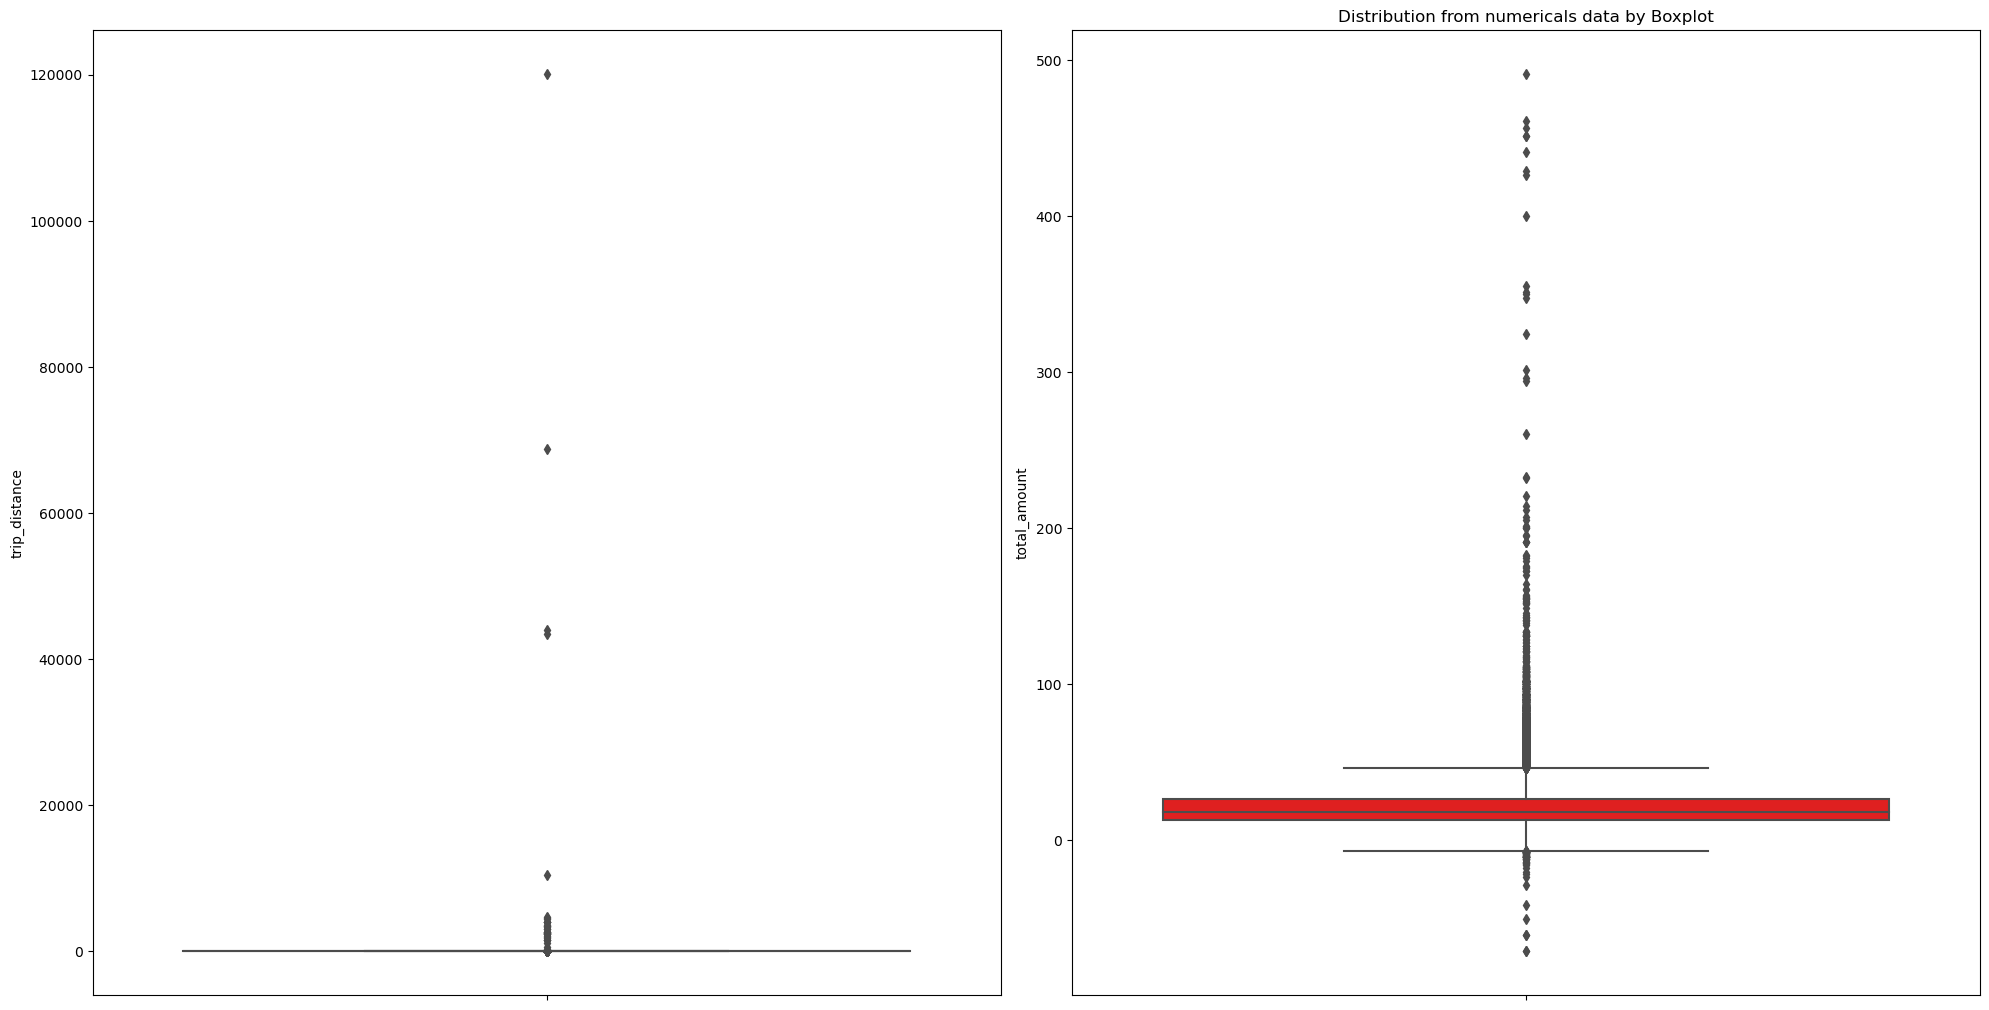

In [55]:
data_numeric = ['trip_distance','total_amount']
features = data_numeric
plt.figure(figsize=(20,10))
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color = 'red', orient = 'v')
    plt.tight_layout()
plt.title('Distribution from numericals data by Boxplot')


In [56]:
def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define the upper and lower bounds to identify outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out rows where the values are within the defined bounds
    df_no_outliers = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    
    return df_no_outliers

In [57]:
df = remove_outliers(df, 'trip_distance')

In [58]:
df = remove_outliers(df, 'total_amount')

In [59]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (60310, 17)
<class 'pandas.core.frame.DataFrame'>
Index: 60310 entries, 0 to 68210
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               60310 non-null  int64  
 1   lpep_pickup_datetime   60310 non-null  object 
 2   lpep_dropoff_datetime  60310 non-null  object 
 3   store_and_fwd_flag     60310 non-null  object 
 4   RatecodeID             60310 non-null  int64  
 5   PULocationID           60310 non-null  int64  
 6   DOLocationID           60310 non-null  int64  
 7   passenger_count        60310 non-null  int64  
 8   trip_distance          60310 non-null  float64
 9   fare_amount            60310 non-null  float64
 10  mta_tax                60310 non-null  float64
 11  tip_amount             60310 non-null  float64
 12  tolls_amount           60310 non-null  float64
 13  improvement_surcharge  60310 non-null  float64
 14  tot

## Mengubah Dtype pada kolom 'lpep_pickup_datetime' dan 'lpep_dropoff_datetime'

In [60]:
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])

In [61]:
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])

Kemudian membuat variable 'df_VendorID_1' & 'df_VendorID_2', agar mudah untuk membandingkan dari mengolah dan menganalisis data.

In [62]:
df_VendorID1 = df[df['VendorID'] == 1]
df_VendorID2 = df[df['VendorID'] == 2]

In [63]:
display(df_VendorID1.head(),df_VendorID1.tail())

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1,41,238,1,1.3,6.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1,41,74,1,1.1,6.0,1.5,0.00,0.0,1.0,8.00,1.0,1.0
6,1,2023-01-01 00:09:14,2023-01-01 00:26:39,N,1,181,45,2,3.8,19.1,1.5,4.85,0.0,1.0,29.20,1.0,1.0
10,1,2023-01-01 00:16:12,2023-01-01 00:41:43,N,1,255,234,2,4.8,26.8,1.5,0.00,0.0,1.0,32.05,1.0,1.0
16,1,2023-01-01 00:10:45,2023-01-01 00:19:37,N,5,83,129,1,1.3,15.0,0.0,0.00,0.0,0.0,15.00,1.0,2.0


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
67823,1,2023-01-28 21:06:57,2023-01-28 21:15:23,N,1,166,41,1,1.2,10.0,0.5,3.13,0.0,1.0,15.63,5.0,1.0
67873,1,2023-01-29 10:01:03,2023-01-29 10:10:54,N,1,74,166,1,2.8,12.8,0.5,2.86,0.0,1.0,17.16,5.0,1.0
67915,1,2023-01-29 17:00:08,2023-01-29 17:14:38,N,1,74,142,1,3.7,17.7,0.5,3.29,0.0,1.0,25.24,5.0,1.0
67962,1,2023-01-30 08:37:09,2023-01-30 08:43:47,N,1,74,41,1,1.2,6.5,0.5,0.80,0.0,1.0,8.80,5.0,1.0
68010,1,2023-01-30 12:58:41,2023-01-30 13:19:30,N,1,74,237,1,3.1,15.5,0.5,2.96,0.0,1.0,22.71,5.0,1.0


In [64]:
df_VendorID1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8055 entries, 3 to 68010
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               8055 non-null   int64         
 1   lpep_pickup_datetime   8055 non-null   datetime64[ns]
 2   lpep_dropoff_datetime  8055 non-null   datetime64[ns]
 3   store_and_fwd_flag     8055 non-null   object        
 4   RatecodeID             8055 non-null   int64         
 5   PULocationID           8055 non-null   int64         
 6   DOLocationID           8055 non-null   int64         
 7   passenger_count        8055 non-null   int64         
 8   trip_distance          8055 non-null   float64       
 9   fare_amount            8055 non-null   float64       
 10  mta_tax                8055 non-null   float64       
 11  tip_amount             8055 non-null   float64       
 12  tolls_amount           8055 non-null   float64       
 13  improve

In [65]:
df_VendorID2.tail()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
68205,2,2023-01-31 21:56:00,2023-01-31 22:14:00,N,1,75,186,1,3.92,20.72,0.0,1.25,0.0,0.3,25.02,5.0,1.0
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,N,1,10,205,1,2.14,4.41,0.0,0.00,0.0,1.0,5.41,5.0,1.0
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,N,1,66,37,1,3.44,16.53,0.0,3.51,0.0,1.0,21.04,5.0,1.0
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,N,1,225,189,1,3.03,14.98,0.0,3.20,0.0,1.0,19.18,5.0,1.0
68210,2,2023-01-31 23:51:00,2023-02-01 00:07:00,N,1,256,140,1,5.82,23.65,0.0,2.00,0.0,1.0,29.40,5.0,1.0


In [66]:
df_VendorID2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52255 entries, 0 to 68210
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               52255 non-null  int64         
 1   lpep_pickup_datetime   52255 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  52255 non-null  datetime64[ns]
 3   store_and_fwd_flag     52255 non-null  object        
 4   RatecodeID             52255 non-null  int64         
 5   PULocationID           52255 non-null  int64         
 6   DOLocationID           52255 non-null  int64         
 7   passenger_count        52255 non-null  int64         
 8   trip_distance          52255 non-null  float64       
 9   fare_amount            52255 non-null  float64       
 10  mta_tax                52255 non-null  float64       
 11  tip_amount             52255 non-null  float64       
 12  tolls_amount           52255 non-null  float64       
 13  improv

In [67]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1,166,143,1,2.58,14.9,0.5,4.03,0.0,1.0,24.18,1.0,1.0
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1,24,43,1,1.81,10.7,0.5,2.64,0.0,1.0,15.84,1.0,1.0
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1,223,179,1,0.00,7.2,0.5,1.94,0.0,1.0,11.64,1.0,1.0
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1,41,238,1,1.30,6.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1,41,74,1,1.10,6.0,1.5,0.00,0.0,1.0,8.00,1.0,1.0


## Data yang sudah bersih
Kita sudah selesai membersihkan data kita, sekarang, mari kita lihat sekilas informasi dari data yang sudah kita bersihkan

Export data yang sudah clean

In [68]:
df.to_csv("Clean_NYC_TLC_Trip_Records.csv")

In [69]:
listItem = []
for col in df.columns:
    unique_values = df[col].drop_duplicates().values
    sample_size = min(2, len(unique_values))
    
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                     df[col].nunique(), list(unique_values[:sample_size])])

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                      data=listItem)
print(df.shape)
dfDesc

(60310, 17)


,dataFeatures,dataType,null,unique,uniqueSample
0,VendorID,int64,0,2,"[2, 1]"
1,lpep_pickup_datetime,datetime64[ns],0,59194,"[2023-01-01T00:26:10.000000000, 2023-01-01T00:51:03.000000000]"
2,lpep_dropoff_datetime,datetime64[ns],0,59189,"[2023-01-01T00:37:11.000000000, 2023-01-01T00:57:49.000000000]"
3,store_and_fwd_flag,object,0,2,"[N, Y]"
4,RatecodeID,int64,0,5,"[1, 5]"
5,PULocationID,int64,0,213,"[166, 24]"
6,DOLocationID,int64,0,240,"[143, 43]"
7,passenger_count,int64,0,6,"[1, 2]"
8,trip_distance,float64,0,635,"[2.58, 1.81]"
9,fare_amount,float64,0,1473,"[14.9, 10.7]"


Sebelum dibersihkan, kita memiliki 68,210 baris data, sekarang kita memiliki 60,310  baris. Sekitar 7,900 baris data yang kosong dihapus, dan sisa data kosong diisi dengan data yang dirasa relevan.

# Data Analysis
Kita sudah melakukan tahap _data cleaning_. Sekarang, kita bisa mulai melakukan analisis untuk mencari tahu **siapakah VendorID yang lebih unggul**.  


In [70]:
df_VendorID1['VendorID'].value_counts()


VendorID
1    8055
Name: count, dtype: int64

In [71]:
df_VendorID2['VendorID'].value_counts()

VendorID
2    52255
Name: count, dtype: int64

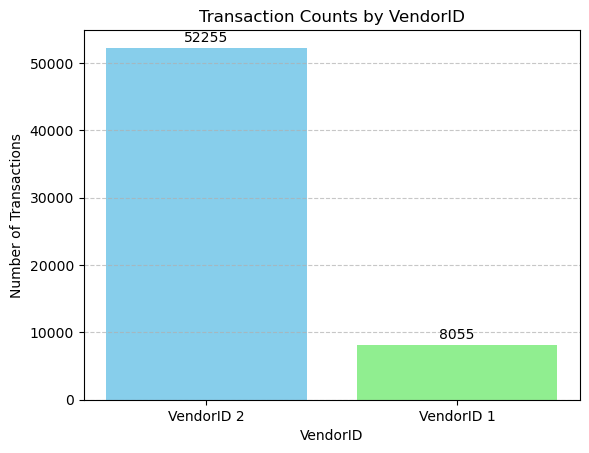

In [72]:

# Data
counts = [df_VendorID2['VendorID'].value_counts().get(2, 0), df_VendorID1['VendorID'].value_counts().get(1, 0)]

# Bar chart
plt.bar(['VendorID 2', 'VendorID 1'], counts, color=['skyblue', 'lightgreen'])
plt.xlabel('VendorID')
plt.ylabel('Number of Transactions')
plt.title('Transaction Counts by VendorID')

# Adding data labels
for i, count in enumerate(counts):
    plt.text(i, count + 500, str(count), ha='center', va='bottom')

# Adding a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

Penjelasan yang dapat diberkan:

    1. VendorID_2 memiliki baris 52,255  dengan 17 kolom.
    2. VendorID_1 memiliki baris 8,055 dengan 21 kolom.

Dengan demikian, VendorID_2 lebih banyak proporsinya atau jumlahnya dibandingkan dengan VendorID_1 pada dataset ini.

# Bar Chart VendorID

### Kedua vendor terhadap passenger count

In [73]:
passenger_count_VendorID= df[["passenger_count", "VendorID"]].groupby("VendorID").sum().sort_values("VendorID", ascending = False).reset_index()
passenger_count_VendorID

,VendorID,passenger_count
0,2,69203
1,1,9220


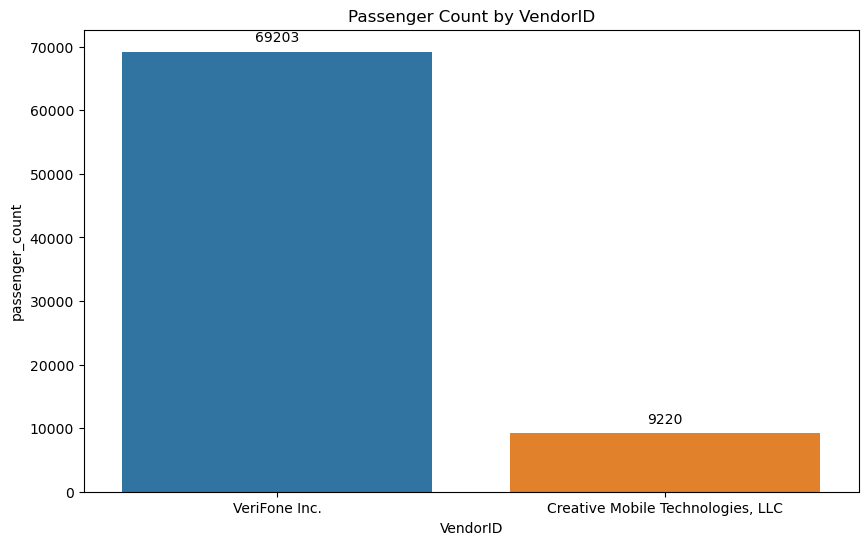

In [74]:
passenger_count_VendorID['VendorID'] = passenger_count_VendorID['VendorID'].replace({
    1: 'Creative Mobile Technologies, LLC',
    2: 'VeriFone Inc.'
})

# Membuat barplot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=passenger_count_VendorID, x='VendorID', y='passenger_count')

# Menambahkan anotasi pada tiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Menambahkan judul
plt.title('Passenger Count by VendorID')

# Menampilkan plot
plt.show()

Penjelasan grafik ini adalah sebagai berikut:

1. Analisis Data:
   - Grafik ini mengambil kolom `passenger_count` dan `VendorID`.
   - Kemudian data dikelompokkan berdasarkan `VendorID` dan dihitung jumlah penumpang (`passenger_count`) untuk setiap grup.
   - Hasilnya diurutkan secara menurun berdasarkan jumlah penumpang menggunakan `sort_values`.
   - DataFrame hasil analisis tersebut disimpan dalam variabel `passenger_count_VendorID`.


2. Informasi yang Disampaikan:
   - Grafik batang ini memberikan informasi tentang jumlah penumpang masing-masing vendor.
   - Grafik ini juga menunjukkan perbedaan jumlah penumpang antara vendor1 dan vendor2.
  

Melalui analisis data dan visualisasi grafik ini, kita dapat membandingkan  jumlah penumpang antara VendorID1 dan VendorID2. Grafik batang memberikan pemahaman secara visual tentang perbedaan passenger_count antara kedua VendorID tersebut. Dengan melihat grafik, kita dapat melihat perbedaan antara kedua VendorID. Maka dari itu, VendorID2 jauh lebih unggul berdasarkan passenger_count dari VendorID1.

### Kedua VendorID terhadap Trip Type 

In [75]:
top_trip_type_VendorID= df[["trip_type", "VendorID"]].groupby("VendorID").sum().sort_values("VendorID", ascending = False).reset_index()
top_trip_type_VendorID

VendorID  \
0         2   
1         1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

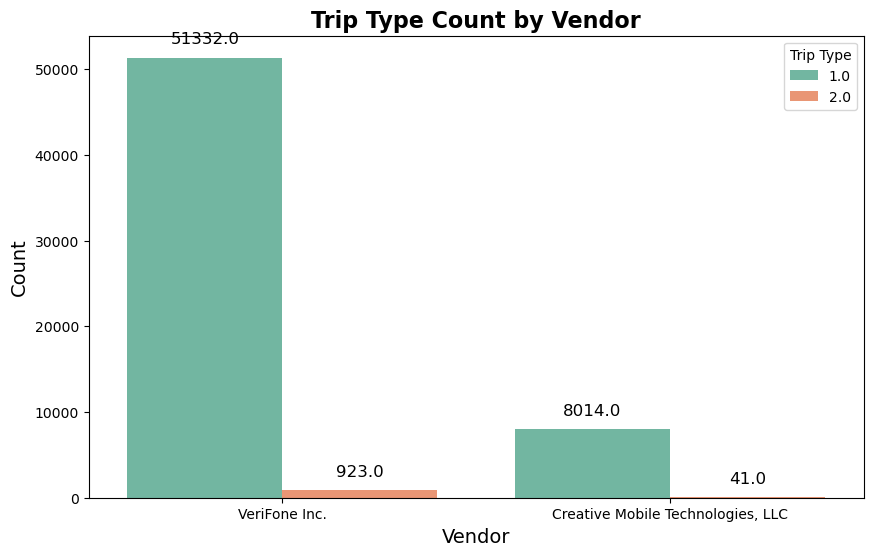

In [76]:
# Mengganti nilai pada kolom 'VendorID'
df['VendorID'] = df['VendorID'].replace({
    1: 'Creative Mobile Technologies, LLC',
    2: 'VeriFone Inc.'
})

# Menggunakan count plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='VendorID', hue='trip_type', palette='Set2')

# Menambahkan judul dan mengatur label sumbu
plt.title('Trip Type Count by Vendor', fontsize=16, fontweight='bold')
plt.xlabel('Vendor', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Menambahkan legend
ax.legend(title='Trip Type')

# Menambahkan anotasi untuk setiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

# Menampilkan plot
plt.show()

Penjelasan grafik ini adalah sebagai berikut:

1. Analisis Data:
   - Grafik ini mengambil kolom `trip_type` dan `VendorID`.
   - Hasilnya diurutkan secara menurun berdasarkan tipe perjalanannya menggunakan `sort_values`.
   - Tipe perjalanan 1.0 (street_hail) dan 2.0 (dispatch)



2. Informasi yang Disampaikan:
   - Grafik batang ini memberikan informasi tentang tipe perjalan penumpang masing-masing vendor.
   - Grafik ini juga menunjukkan perbedaan jumlah penumpang antara vendor1 dan vendor2 secara 1.0 (street-hail) dan 2.0 (dispatch).
  

Melalui analisis data dan visualisasi grafik ini, kita dapat membandingkan  trip_type antara VendorID1 dan VendorID2. Grafik batang memberikan pemahaman secara visual tentang perbedaan trip_type antara kedua VendorID tersebut. Dengan melihat grafik, kita dapat melihat perbedaan antara kedua VendorID. Maka dari itu, VendorID2 jauh lebih unggul berdasarkan trip_type 1.0 (street-hail) dari VendorID1.

In [77]:
total_amount_VendorID= df[["total_amount", "VendorID"]].groupby("VendorID").sum().sort_values("VendorID", ascending = False).reset_index()
total_amount_VendorID

,VendorID,total_amount
0,VeriFone Inc.,949689.08
1,"Creative Mobile Technologies, LLC",142514.97


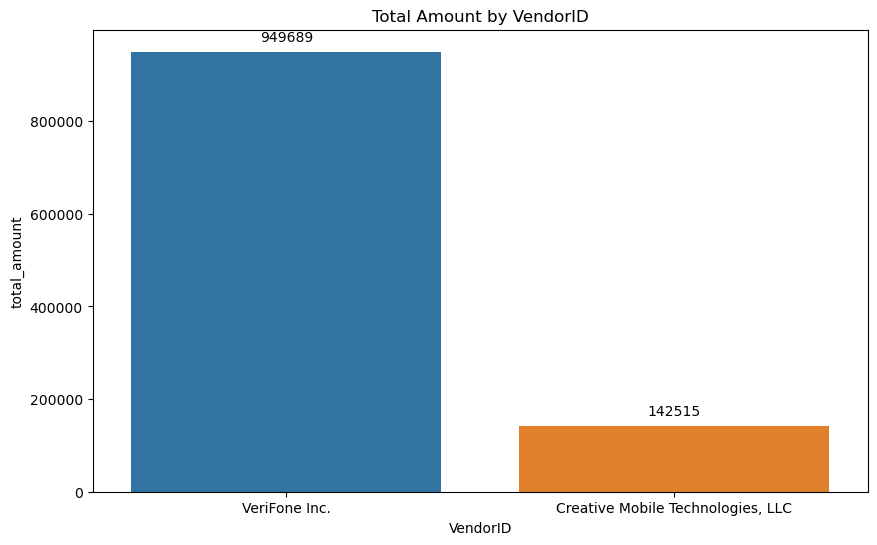

In [78]:
total_amount_VendorID['VendorID'] = total_amount_VendorID['VendorID'].replace({
    1: 'Creative Mobile Technologies, LLC',
    2: 'VeriFone Inc.'
})

# Membuat barplot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=total_amount_VendorID, x='VendorID', y='total_amount')

# Menambahkan anotasi pada tiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Menambahkan judul
plt.title('Total Amount by VendorID')

# Menampilkan plot
plt.show()

Penjelasan grafik ini adalah sebagai berikut:

1. Analisis Data:
   - Grafik ini mengambil kolom `total_amount` dan `VendorID`.
   - Hasilnya diurutkan berdasarkan vendorID menggunakan `sort_values`.
   - DataFrame hasil analisis tersebut disimpan dalam variabel `total_amount_VendorID`.


2. Informasi yang Disampaikan:
   - Grafik batang ini memberikan informasi tentang jumlah total tarif yang dikenakan kepada penumpang untuk masing-masing vendor.
   - Grafik ini juga menunjukkan perbedaan jumlah total tarif yang dikenakan kepada penumpang antara vendor1 dan vendor2.
  

Melalui analisis data dan visualisasi grafik ini, kita dapat membandingkan  total_amount antara VendorID1 dan VendorID1. Grafik batang memberikan pemahaman secara visual tentang perbedaan total_amount antara kedua VendorID tersebut. Dengan melihat grafik, kita dapat melihat perbedaan antara kedua VendorID. Maka dari itu, VendorID2 jauh lebih unggul berdasarkan total_amount dari VendorID1.

In [79]:
trip_distance_VendorID= df[['trip_distance', 'VendorID']].groupby('VendorID').sum().sort_values('VendorID', ascending = False).reset_index()
trip_distance_VendorID

,VendorID,trip_distance
0,VeriFone Inc.,105963.25
1,"Creative Mobile Technologies, LLC",14249.70


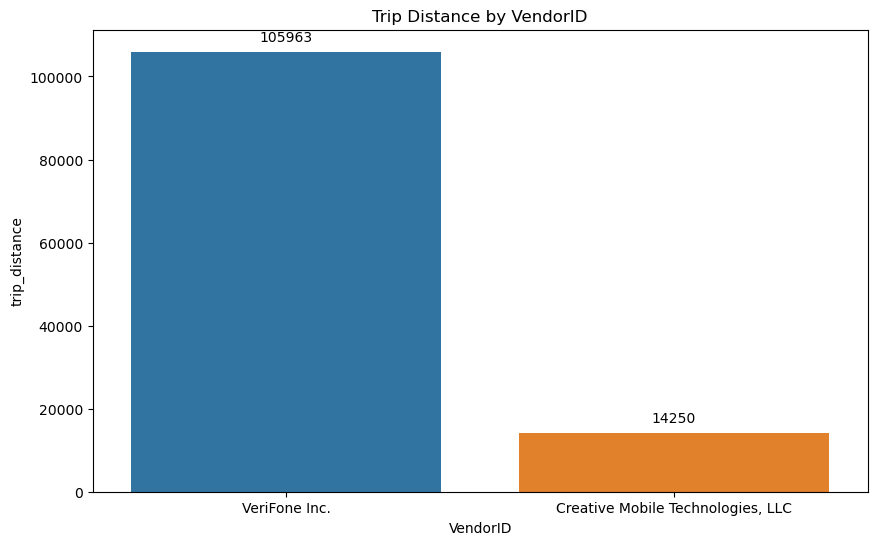

In [80]:
trip_distance_VendorID['VendorID'] = trip_distance_VendorID['VendorID'].replace({
    1: 'Creative Mobile Technologies, LLC',
    2: 'VeriFone Inc.'
})

# Membuat barplot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=trip_distance_VendorID, x='VendorID', y='trip_distance')

# Menambahkan anotasi pada tiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Menambahkan judul
plt.title('Trip Distance by VendorID')

# Menampilkan plot
plt.show()

Penjelasan grafik ini adalah sebagai berikut:

1. Analisis Data:
   - Grafik ini mengambil kolom `trip_distance` dan `VendorID`.
   - Hasilnya diurutkan berdasarkan vendorID menggunakan `sort_values`.
   - DataFrame hasil analisis tersebut disimpan dalam variabel `trip_distance_VendorID`.


2. Informasi yang Disampaikan:
   - Grafik batang ini memberikan informasi tentang jarak tempuh untuk masing-masing vendor.
   - Grafik ini juga menunjukkan perbedaan jumlah jarak tempuh antara vendor1 dan vendor2.
  

Melalui analisis data dan visualisasi grafik ini, kita dapat membandingkan  trip_distance antara VendorID1 dan VendorID1. Grafik batang memberikan pemahaman yang visual tentang perbedaan trip_distance antara kedua VendorID tersebut. Dengan melihat grafik, kita dapat melihat perbedaan antara kedua VendorID.Maka dari itu, VendorID2 jauh lebih unggul berdasarkan trip_distance dari VendorID1.

# Kesimpulan dan Rekomendasi 

Dari analisis yang telah dibuat, kita dapat membuat kesimpulan tentang VendorID New York City TLC Trip Record:

* VeriFone. (VendorID2) paling unggul dibandingkan dengan Creative Mobile Technologies, LLC. (VendorID1) berdasarkan, sebagai berikut: 

    1. passenger_count
    2. trip_type
    3. total_amount
    4. trip_distance

* Kualitas dan performa dari Creative Mobile Technologies, LLC. (VendorID_1) dan VeriFone. (VendorID_2), yaitu sebagai berikut:

    1. Dari passenger_count, menjelaskan bahwa kualitas dan performa VendorID2 lebih baik dibandingkan VendorID1, dimana VendorID2 mempunyai total penumpang sebanyak 69203 yang dimana jauh lebih tinggi dan unggul dari Vendor1 yang total penumpangnya hanya sebanyak 9220.
    
    2. Dari trip_type, menjelaskan bahwa VendorID2 mempunyai kualitas dan performa lebih baik dari VendorID1 ,kedua Vendor sama sama memiliki tipe penumpang 1.0 atau Street-Hail daripada 2.0 yaitu dispatch. VendorID2 memiliki total trip_type 1.0 (street-hail) sebanyak 51332 dan 2.0 (dispatch) sebanyak 923 sedangkan VendorID1 memiliki total trip_type 1.0 (street-hail) sebanyak 8014 dan 2.0 (dispatch) sebanyak 41

    3. Dari total_amount, menjelaskan bahwa kualitas dan performa pada total_amount Vendor2 lebih bagus dibandingkan Vendor 1, dimana total_amount Vendor2 sebanyak 949689 dan total_amount VendorID1 sebanyak 142515.

    5. Dari trip_distance, menjelaskan bahwa kualitas pada trip_distance di VendorID2 jauh lebih baik dibandingkan dengan VendorID1 , dimana total trip_distance VendorID2 sebanyak 105963 sedangkan VendorID1 sebanyak 14250.

**Rekomendasi**
Berdasarkan kesimpulan dari analisis data, kami memberikan beberapa rekomendasi untuk perusahaan terkait VendorID New York City TLC Trip Record:

1. Prioritaskan Penggunaan VeriFone (VendorID2):
Mengingat kualitas dan performa yang lebih baik dari VeriFone (VendorID2) dalam parameter seperti jumlah penumpang, tipe perjalanan, total biaya, dan jarak perjalanan, disarankan untuk memberikan prioritas pada penggunaan VeriFone sebagai penyedia layanan.

2. Optimalkan Pemanfaatan Trip Type 1.0 (Street-Hail):
Diketahui bahwa trip type 1.0 (Street-Hail) lebih umum digunakan daripada trip type 2.0 (Dispatch). Oleh karena itu, perusahaan dapat mempertimbangkan untuk mengoptimalkan pemanfaatan trip type 1.0 sebagai strategi utama dalam layanan mereka.

3. Perhatikan Faktor Total Amount dalam Penentuan Vendor:
Total amount merupakan indikator penting dalam menilai performa Vendor. VeriFone (VendorID2) menunjukkan jumlah total_amount yang signifikan lebih tinggi daripada Creative Mobile Technologies, LLC. (VendorID1). Oleh karena itu, dalam pemilihan Vendor, perusahaan sebaiknya mempertimbangkan total amount sebagai faktor kunci.

4. Monitor dan Evaluasi Secara Berkala:
Perusahaan disarankan untuk melakukan pemantauan dan evaluasi secara berkala terhadap kinerja kedua Vendor. Analisis rutin dapat membantu dalam mengidentifikasi perubahan tren, kebutuhan pasar, dan memastikan bahwa Vendor yang dipilih terus memberikan layanan yang optimal.

5. Pertimbangkan Pengembangan Kerja Sama Lebih Lanjut:
Berdasarkan perbandingan kinerja, perusahaan dapat mempertimbangkan untuk mengembangkan kerja sama lebih lanjut dengan VeriFone (VendorID2), seperti negosiasi kontrak jangka panjang atau pemberian insentif untuk mendorong pertumbuhan kerja sama.

Dengan menerapkan rekomendasi ini, diharapkan perusahaan dapat meningkatkan efisiensi, kepuasan pelanggan, dan hasil bisnis secara keseluruhan. Selain itu, fleksibilitas untuk beradaptasi dengan perubahan pasar dan kebutuhan pelanggan juga menjadi kunci keberhasilan jangka panjang.
